<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_Prg3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/Program_3a_Dataset.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Data Preprocessing**

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


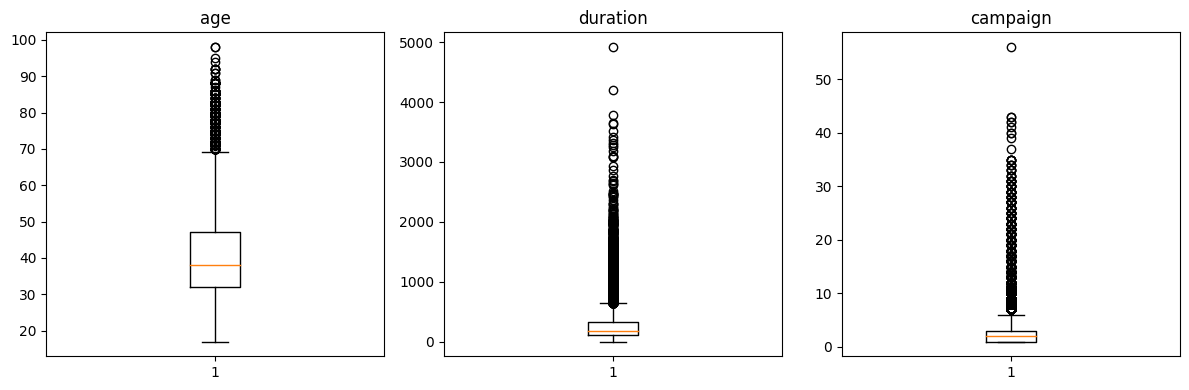

In [10]:
num_df = df[['age', 'duration', 'campaign', ]]
num_attributes = len(num_df.columns)
num_cols = 3
num_rows = -(-num_attributes // num_cols)  # Ceiling division to ensure enough rows

# Calculate figsize based on the number of rows and columns
fig_width = 4 * num_cols
fig_height = 4 * num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot boxplots for each attribute
for i, col in enumerate(num_df.columns):
    axes[i].boxplot(num_df[col])
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
outliers1 = np.where(num_df['duration']>4000)[0]
outliers1

array([22159, 24058])

In [12]:
outliers2 = np.where(num_df['campaign']>45)[0]
outliers2

array([4074])

In [13]:
num_df.drop(index=outliers1, inplace=True)
num_df.drop(index=outliers2, inplace=True)

<ipython-input-13-558a6e11562c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df.drop(index=outliers1, inplace=True)
<ipython-input-13-558a6e11562c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df.drop(index=outliers2, inplace=True)


In [16]:
df.drop(index=outliers1, inplace=True)
df.drop(index=outliers2, inplace=True)

**Logistic Regression model using scikit-learn**

In [27]:
from sklearn.model_selection import train_test_split

X=num_df
Y=df[['y']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

**After using Logistic Regression on normally split train and test data, there was a lot of class imabalance observed, Therefore, SMOTE technique is applied for upsampling and to get more a accurate classification model.**

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, Y_train_resampled  = smote.fit_resample(X_train, Y_train)
X_test_resampled, Y_test_resampled = smote.fit_resample(X_test, Y_test)

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_resampled, Y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Classification Report**

In [39]:
from sklearn.metrics import accuracy_score, classification_report

Y_pred_train = logreg.predict(X_train_resampled)
accuracy_train = accuracy_score(Y_train_resampled,Y_pred_train)
Y_pred_test = logreg.predict(X_test_resampled)
accuracy_test = accuracy_score(Y_test_resampled, Y_pred_test)

report = classification_report(Y_test_resampled, Y_pred_test)

print(f'Accuracy(train): {accuracy_train:.2f}')
print(f'Accuracy(test): {accuracy_test:.2f}')


print(report)

Accuracy(train): 0.74
Accuracy(test): 0.75
              precision    recall  f1-score   support

          no       0.72      0.81      0.76     10962
         yes       0.78      0.69      0.73     10962

    accuracy                           0.75     21924
   macro avg       0.75      0.75      0.75     21924
weighted avg       0.75      0.75      0.75     21924



**Confusion Matrix**

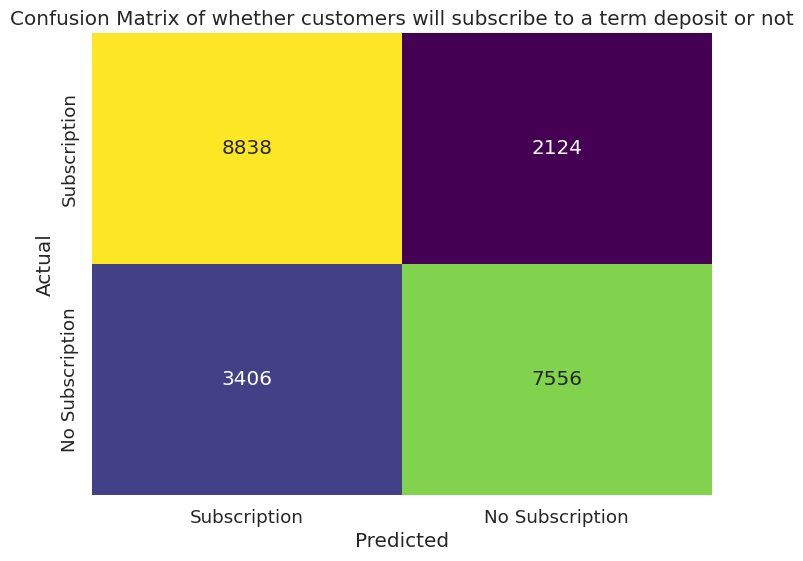

In [41]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test_resampled, Y_pred_test)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Subscription', 'No Subscription'], yticklabels=['Subscription', 'No Subscription'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of whether customers will subscribe to a term deposit or not')
plt.show()

**As we can see, the model predicted that most of the TRUE POSITIVES AND NEGATIVES correctly. However, there is still a considerable number of FALSE POSITIVES AND NEGATIVES, hence the dataset needs to be more accurate. Along with that, taking more features while building the Logistic Regression Classficiation Model would be a good call since that will increase the accuracy and hence reduce the number of FALSE POSITIVES AND NEGATIVES.**